In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Report notebook

In [64]:
import pandas as pd

from tmdb15k.notebooks import Genres, Keywords, Popularity, VoteAverage, VoteCount

df = pd.read_csv('datasets/tmdb-15000-movies.csv', lineterminator='\n')

df = df[df['popularity'] <= 100]
df = df[df['vote_count'] >= 100]

popularity = Popularity(df)
vote_average = VoteAverage(df)
vote_count = VoteCount(df)
genres = Genres(df)
keywords = Keywords(df)

/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/notebooks.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.fillna(0, inplace=True)
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/notebooks.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[dst] = (df[src] - df[src].min()) / (df[src].max() - df[src].min())
/home/cezar/code/cezarmathe/bigdata-tmdb-1500/tmdb15k/notebooks.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [65]:
from tmdb15k.notebooks import ComputedLinearRegression

genres_lr = ComputedLinearRegression(genres.df, vote_average.df_min_max)

print('Linear Regression: genres -> vote_average')
print(genres_lr.mse)
print(genres_lr.rmse)

keywords_lr = ComputedLinearRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Linear Regression: keywords -> vote_average')
print(keywords_lr.mse)
print(keywords_lr.rmse)

genres_keywords_lr = ComputedLinearRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Linear Regression: genres + keywords -> vote_average')
print(genres_keywords_lr.mse)
print(genres_keywords_lr.rmse)

Linear Regression: genres -> vote_average
0.03023663478567343
0.17388684477462185
Linear Regression: keywords -> vote_average
0.03495219493311523
0.1869550612663782
Linear Regression: genres + keywords -> vote_average
0.029755675035481693
0.1724983334281282


In [66]:
from tmdb15k.notebooks import ComputedDecisionTreeRegression 

genres_dtr = ComputedDecisionTreeRegression(genres.df, vote_average.df_min_max)

print('Decision Tree Regression: genres -> vote_average')
print(f"MSE: {genres_dtr.mse}")
print(f"RMSE: {genres_dtr.rmse}")

keywords_dtr = ComputedDecisionTreeRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Decision Tree Regression: keywords -> vote_average')
print(f"MSE: {keywords_dtr.mse}")
print(f"RMSE: {keywords_dtr.rmse}")

genres_keywords_dtr = ComputedDecisionTreeRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Decision Tree Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_dtr.mse}")
print(f"RMSE: {genres_keywords_dtr.rmse}")

Decision Tree Regression: genres -> vote_average
MSE: 0.0324227556287876
RMSE: 0.18006319898521075
Decision Tree Regression: keywords -> vote_average
MSE: 0.036650399699201176
RMSE: 0.19144294110570173
Decision Tree Regression: genres + keywords -> vote_average
MSE: 0.03823559099051083
RMSE: 0.19553923133353784


In [67]:
from tmdb15k.notebooks import ComputedRandomForestRegression 

genres_rfr = ComputedRandomForestRegression(genres.df, vote_average.df_min_max)

print('Random Forest Regression: genres -> vote_average')
print(f"MSE: {genres_rfr.mse}")
print(f"RMSE: {genres_rfr.rmse}")

keywords_rfr = ComputedRandomForestRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Random Forest Regression: keywords -> vote_average')
print(f"MSE: {keywords_rfr.mse}")
print(f"RMSE: {keywords_rfr.rmse}")

genres_keywords_rfr = ComputedRandomForestRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Random Forest Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_rfr.mse}")
print(f"RMSE: {genres_keywords_rfr.rmse}")

Random Forest Regression: genres -> vote_average
MSE: 0.031211262871481203
RMSE: 0.17666709617662596
Random Forest Regression: keywords -> vote_average
MSE: 0.0361465377897952
RMSE: 0.1901224284238848
Random Forest Regression: genres + keywords -> vote_average
MSE: 0.032555831493980544
RMSE: 0.18043234603025185


In [68]:
from tmdb15k.notebooks import ComputedGradientBoostingRegression

genres_gbr = ComputedGradientBoostingRegression(genres.df, vote_average.df_min_max)

print('Gradient Boosting Regression: genres -> vote_average')
print(f"MSE: {genres_gbr.mse}")
print(f"RMSE: {genres_gbr.rmse}")

keywords_gbr = ComputedGradientBoostingRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('Gradient Boosting Regression: keywords -> vote_average')
print(f"MSE: {keywords_gbr.mse}")
print(f"RMSE: {keywords_gbr.rmse}")

genres_keywords_gbr = ComputedGradientBoostingRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('Gradient Boosting Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_gbr.mse}")
print(f"RMSE: {genres_keywords_gbr.rmse}")

Gradient Boosting Regression: genres -> vote_average
MSE: 0.02972112822672413
RMSE: 0.17239816770117986
Gradient Boosting Regression: keywords -> vote_average
MSE: 0.03513558557745313
RMSE: 0.18744488677329432
Gradient Boosting Regression: genres + keywords -> vote_average
MSE: 0.029358874364907295
RMSE: 0.17134431523954127


In [69]:
from tmdb15k.notebooks import ComputedXGBRegression

genres_xgbr = ComputedXGBRegression(genres.df, vote_average.df_min_max)

print('XGB Regression: genres -> vote_average')
print(f"MSE: {genres_xgbr.mse}")
print(f"RMSE: {genres_xgbr.rmse}")

keywords_xgbr = ComputedXGBRegression(keywords.df[keywords.columns_top_20], vote_average.df_min_max)

print('XGB Regression: keywords -> vote_average')
print(f"MSE: {keywords_xgbr.mse}")
print(f"RMSE: {keywords_xgbr.rmse}")

genres_keywords_xgbr = ComputedXGBRegression([genres.df, keywords.df[keywords.columns_top_20]], vote_average.df_min_max)

print('XGB Regression: genres + keywords -> vote_average')
print(f"MSE: {genres_keywords_xgbr.mse}")
print(f"RMSE: {genres_keywords_xgbr.rmse}")

XGB Regression: genres -> vote_average
MSE: 0.0305959626353533
RMSE: 0.1749170164259421
XGB Regression: keywords -> vote_average
MSE: 0.03639962136058778
RMSE: 0.19078684797592255
XGB Regression: genres + keywords -> vote_average
MSE: 0.030427145648079617
RMSE: 0.17443378585606523


Summary for Genres -> Vote Average
                          Model      RMSE
3  Gradient Boosting Regression  0.172398
0             Linear Regression  0.173887
4                XGB Regression  0.174917
2      Random Forest Regression  0.176667
1      Decision Tree Regression  0.180063


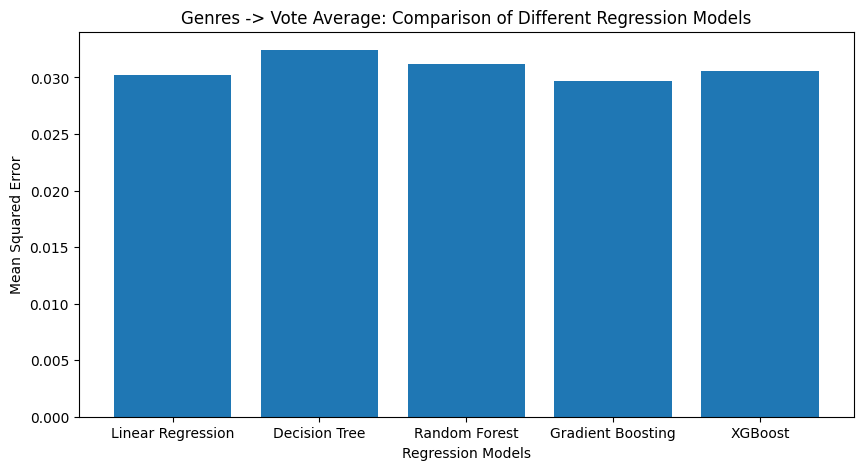

Summary for Keywords -> Vote Average
                          Model      RMSE
0             Linear Regression  0.186955
3  Gradient Boosting Regression  0.187445
2      Random Forest Regression  0.190122
4                XGB Regression  0.190787
1      Decision Tree Regression  0.191443


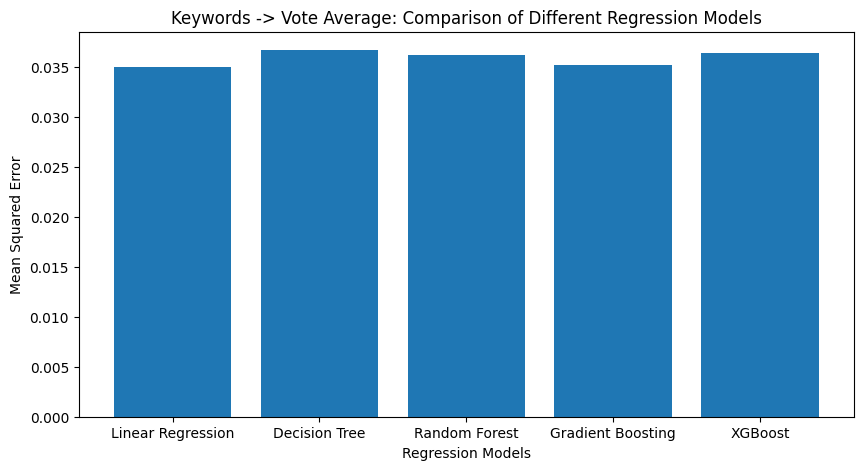

Summary for Genres + Keywords -> Vote Average
                          Model      RMSE
3  Gradient Boosting Regression  0.171344
0             Linear Regression  0.172498
4                XGB Regression  0.174434
2      Random Forest Regression  0.180432
1      Decision Tree Regression  0.195539


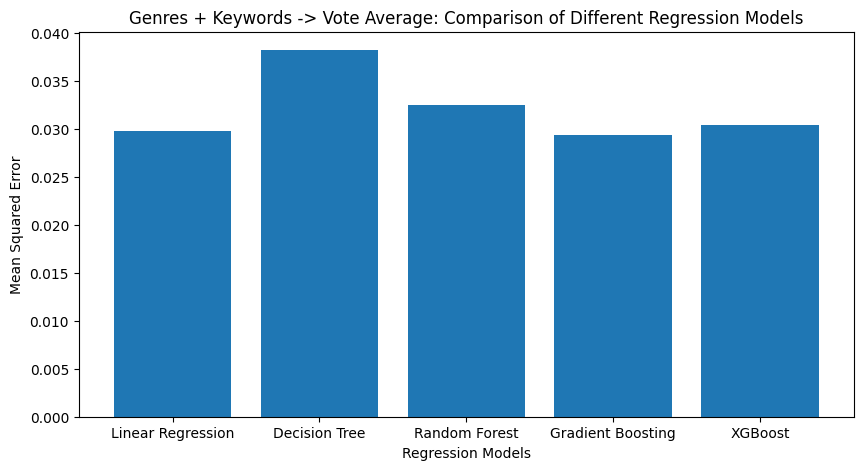

Summary for Genres -> Vote Count
                          Model      RMSE
3  Gradient Boosting Regression  0.173473
4                XGB Regression  0.175694
0             Linear Regression  0.176139
2      Random Forest Regression  0.176347
1      Decision Tree Regression  0.178526


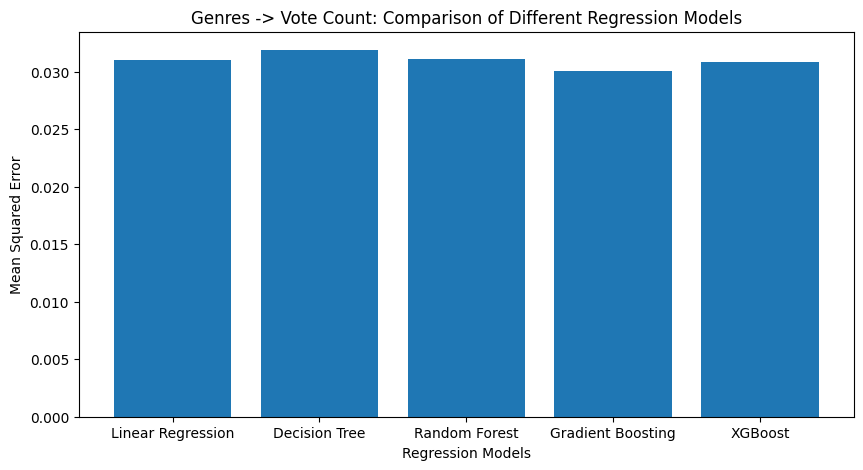

Summary for Keywords -> Vote Count
                          Model      RMSE
3  Gradient Boosting Regression  0.174603
0             Linear Regression  0.175045
2      Random Forest Regression  0.177182
4                XGB Regression  0.177411
1      Decision Tree Regression  0.179232


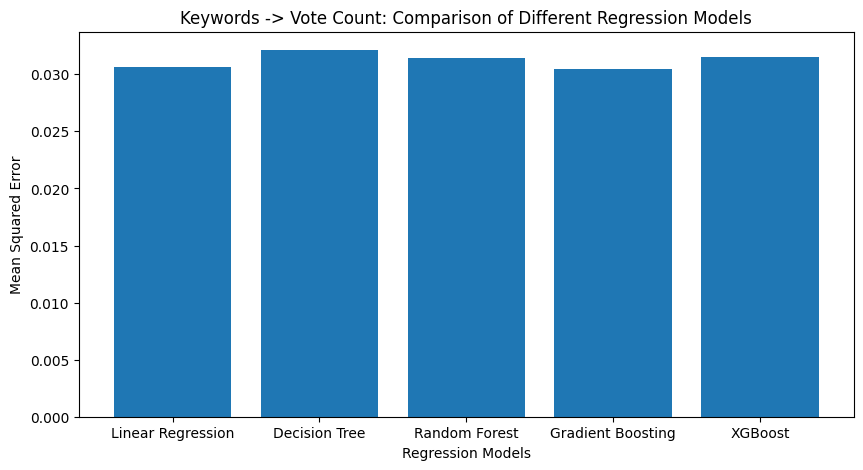

Summary for Genres + Keywords -> Vote Count
                          Model      RMSE
3  Gradient Boosting Regression  0.169245
0             Linear Regression  0.170715
4                XGB Regression  0.174887
2      Random Forest Regression  0.180461
1      Decision Tree Regression  0.197791


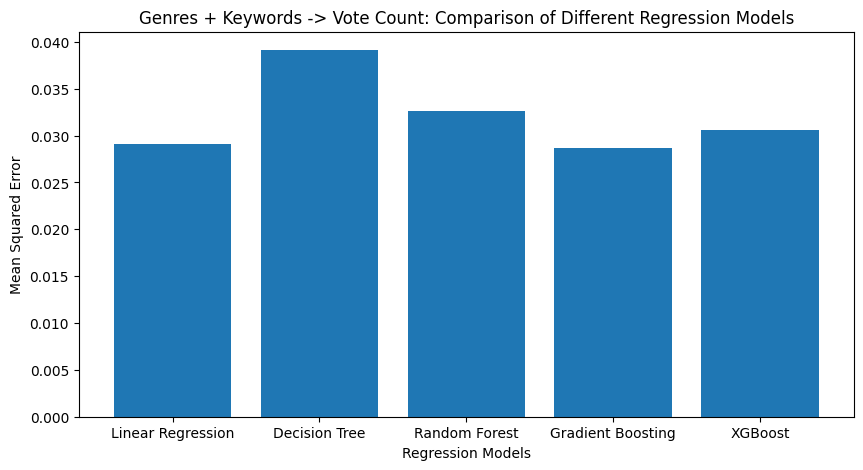

Summary for Genres -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  0.135079
0             Linear Regression  0.137462
2      Random Forest Regression  0.138442
4                XGB Regression  0.138491
1      Decision Tree Regression  0.140094


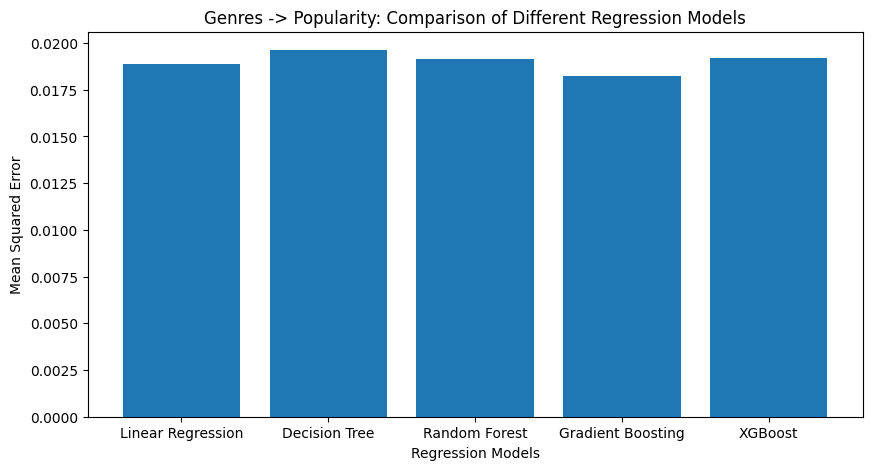

Summary for Keywords -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  0.145089
0             Linear Regression  0.145164
2      Random Forest Regression  0.147566
4                XGB Regression  0.148144
1      Decision Tree Regression  0.149516


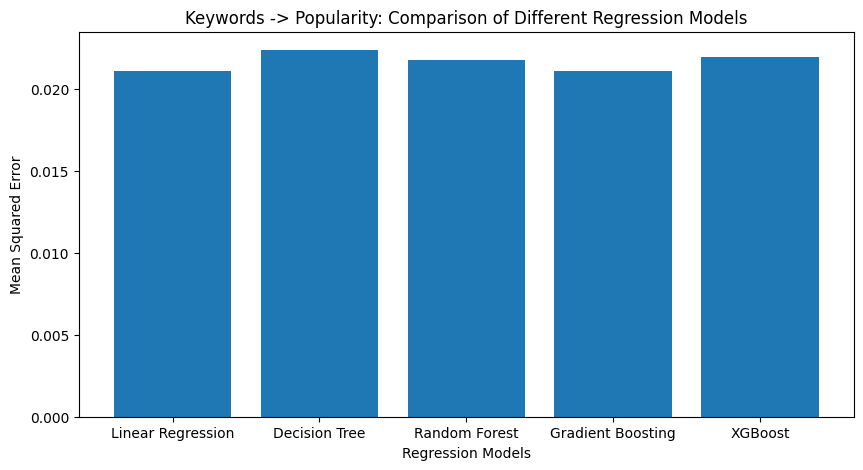

Summary for Genres + Keywords -> Popularity
                          Model      RMSE
3  Gradient Boosting Regression  0.134164
0             Linear Regression  0.136135
4                XGB Regression  0.138197
2      Random Forest Regression  0.142596
1      Decision Tree Regression  0.158926


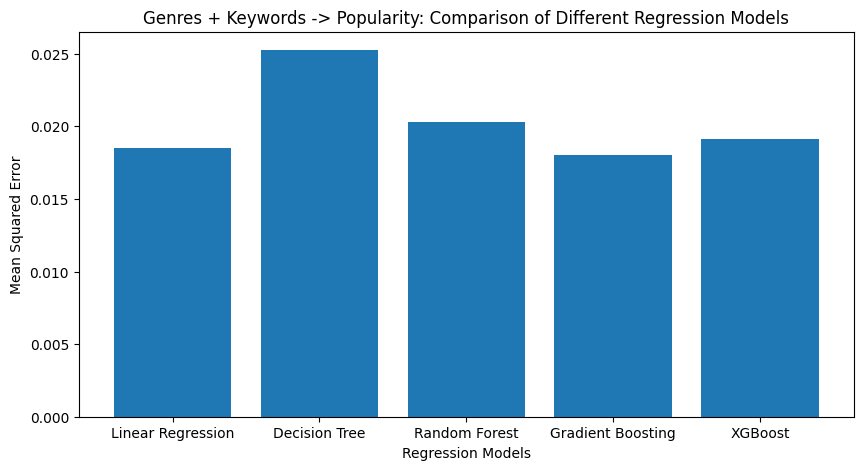

In [70]:
from matplotlib import pyplot as plt

from tmdb15k.notebooks import ModelAnalysis

analysis: list[dict] = [
    {
        'X': genres.df,
        'y': vote_average.df_min_max,
        'name': 'Genres -> Vote Average'
    },
    {
        'X': keywords.df[keywords.columns_top_20],
        'y': vote_average.df_min_max,
        'name': 'Keywords -> Vote Average'
    },
    {
        'X': [genres.df, keywords.df[keywords.columns_top_20]],
        'y': vote_average.df_min_max,
        'name': 'Genres + Keywords -> Vote Average'
    },
    {
        'X': genres.df,
        'y': vote_count.df_log10_min_max,
        'name': 'Genres -> Vote Count'
    },
    {
        'X': keywords.df[keywords.columns_top_20],
        'y': vote_count.df_log10_min_max,
        'name': 'Keywords -> Vote Count'
    },
    {
        'X': [genres.df, keywords.df[keywords.columns_top_20]],
        'y': vote_count.df_log10_min_max,
        'name': 'Genres + Keywords -> Vote Count'
    },
    {
        'X': genres.df,
        'y': popularity.df_min_max,
        'name': 'Genres -> Popularity'
    },
    {
        'X': keywords.df[keywords.columns_top_20],
        'y': popularity.df_min_max,
        'name': 'Keywords -> Popularity'
    },
    {
        'X': [genres.df, keywords.df[keywords.columns_top_20]],
        'y': popularity.df_min_max,
        'name': 'Genres + Keywords -> Popularity'
    }
]

for i in analysis:
    ma = ModelAnalysis(i['X'], i['y'])
    print(f"Summary for {i['name']}")
    print(ma.summary())
    models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
    mse_values = [
        ma.lr.mse,
        ma.dtr.mse,
        ma.rfr.mse,
        ma.gbr.mse,
        ma.xgbr.mse
    ]
    plt.figure(figsize=(10, 5))
    plt.bar(models, mse_values)
    plt.xlabel('Regression Models')
    plt.ylabel('Mean Squared Error')
    plt.title(f"{i['name']}: Comparison of Different Regression Models")
    plt.show()
   